# All in one

### Description 
**Цель:** Собрать все методы в одном файле

**Вход:** Таблица с различными критериями

**Задачи:**
- Провести исследование таблицы
- Привести к корректному виду
- Провести обучение 3 способами

## 0. Библиотеки

In [136]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

## 1. Загружаем данные

In [137]:
train_doc = "https://raw.githubusercontent.com/sDismuss/machine_learning/main/aug_train.csv"
test_doc = "https://raw.githubusercontent.com/sDismuss/machine_learning/main/aug_test.csv"
y_doc = "https://raw.githubusercontent.com/sDismuss/machine_learning/main/sample_submission.csv"

data_raw = pd.read_csv(train_doc)
X_raw_test = pd.read_csv(test_doc)

## 2. Визуализация данных

In [138]:
data_raw.shape

(19158, 14)

In [139]:
data_raw.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [140]:
data_raw.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


## 3. Чистим пустые значения

In [141]:
data_raw.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [142]:
data_raw.fillna(data_raw.median(axis = 0), axis=0 , inplace=True)

data_raw['gender'].fillna(data_raw['gender'].mode().iloc[0], inplace=True)
data_raw['enrolled_university'].fillna(data_raw['enrolled_university'].mode().iloc[0], inplace=True)
data_raw['education_level'].fillna(data_raw['education_level'].mode().iloc[0], inplace=True)
data_raw['major_discipline'].fillna(data_raw['major_discipline'].mode().iloc[0], inplace=True)
data_raw['experience'].fillna(data_raw['experience'].mode().iloc[0], inplace=True)
data_raw['company_size'].fillna(data_raw['company_size'].mode().iloc[0], inplace=True)
data_raw['company_type'].fillna(data_raw['company_type'].mode().iloc[0], inplace=True)
data_raw['last_new_job'].fillna(data_raw['last_new_job'].mode().iloc[0], inplace=True)

In [143]:
data_raw.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

## 4. Деление на тренировочные данные и тестовые

Данные являются несбалансированными. Количество непринятых на работу людей многократно превышает количество принятых.
Было принято решение отбросить лишние значения, чтобы скорректировать значения

In [144]:
data_raw_1 = data_raw[data_raw["target"] == 1]
data_raw_0 = data_raw[data_raw["target"] == 0]

data_balance = data_raw_1.append(data_raw_0[:5000])

Id кандидатов и название города являются лишними столбцами

In [145]:
y_train = data_balance["target"]
norm_data = data_balance.drop(["enrollee_id", "city", "target"], axis=1)

## 5. Обработка категориальных признаков

Данные нужно категоризовать:

In [146]:
norm_data["gender"] = norm_data["gender"].astype('category')
norm_data["relevent_experience"] = norm_data["relevent_experience"].astype('category')
norm_data["enrolled_university"] = norm_data["enrolled_university"].astype('category')
norm_data["education_level"] = norm_data["education_level"].astype('category')
norm_data["major_discipline"] = norm_data["major_discipline"].astype('category')
norm_data["experience"] = norm_data["experience"].astype('category')
norm_data["company_size"] = norm_data["company_size"].astype('category')
norm_data["company_type"] = norm_data["company_type"].astype('category')
norm_data["last_new_job"] = norm_data["last_new_job"].astype('category')

А затем бинаризовать:

In [147]:
gender_dummies = pd.get_dummies(norm_data["gender"])
norm_data = pd.concat((norm_data, gender_dummies), axis=1)
norm_data = norm_data.drop(["gender"], axis=1)

relevent_experience_dummies = pd.get_dummies(norm_data["relevent_experience"])
norm_data = pd.concat((norm_data, relevent_experience_dummies), axis=1)
norm_data = norm_data.drop(["relevent_experience"], axis=1)

enrolled_university_dummies = pd.get_dummies(norm_data["enrolled_university"])
norm_data = pd.concat((norm_data, enrolled_university_dummies), axis=1)
norm_data = norm_data.drop(["enrolled_university"], axis=1)

education_level_dummies = pd.get_dummies(norm_data["education_level"])
norm_data = pd.concat((norm_data, education_level_dummies), axis=1)
norm_data = norm_data.drop(["education_level"], axis=1)

major_discipline_dummies = pd.get_dummies(norm_data["major_discipline"])
norm_data = pd.concat((norm_data, major_discipline_dummies), axis=1)
norm_data = norm_data.drop(["major_discipline"], axis=1)

experience_dummies = pd.get_dummies(norm_data["experience"])
norm_data = pd.concat((norm_data, experience_dummies), axis=1)
norm_data = norm_data.drop(["experience"], axis=1)

company_size_dummies = pd.get_dummies(norm_data["company_size"])
norm_data = pd.concat((norm_data, company_size_dummies), axis=1)
norm_data = norm_data.drop(["company_size"], axis=1)

company_type_dummies = pd.get_dummies(norm_data["company_type"])
norm_data = pd.concat((norm_data, company_type_dummies), axis=1)
norm_data = norm_data.drop(["company_type"], axis=1)

last_new_job_dummies = pd.get_dummies(norm_data["last_new_job"])
norm_data = pd.concat((norm_data, last_new_job_dummies), axis=1)
norm_data = norm_data.drop(["last_new_job"], axis=1)

## 6. Нормализация

In [148]:
data_stand = (norm_data - norm_data.mean(axis = 0))/norm_data.std(axis = 0)
data_stand.describe()

,city_development_index,training_hours,Female,Male,Other,Has relevent experience,No relevent experience,Full time course,Part time course,no_enrollment,...,NGO,Other,Public Sector,Pvt Ltd,1,2,3,4,>4,never
count,9.777000e+03,9.777000e+03,9.777000e+03,9.777000e+03,9.777000e+03,9.777000e+03,9.777000e+03,9.777000e+03,9.777000e+03,9.777000e+03,...,9.777000e+03,9.777000e+03,9.777000e+03,9.777000e+03,9.777000e+03,9.777000e+03,9.777000e+03,9.777000e+03,9.777000e+03,9.777000e+03
mean,6.319675e-15,-2.650364e-17,1.331586e-15,-5.324801e-16,7.515865e-16,-7.023100e-15,7.023100e-15,-5.324097e-15,4.451339e-17,1.673794e-16,...,-1.382476e-15,-1.787860e-16,1.246506e-15,5.142767e-15,2.724265e-15,1.187520e-15,8.550943e-16,6.945849e-16,2.795634e-15,5.550774e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.668977e+00,-1.077616e+00,-2.635385e-01,-3.484234e+00,-1.061751e-01,-1.475192e+00,-6.778087e-01,-5.495513e-01,-2.565905e-01,-1.550484e+00,...,-1.642956e-01,-7.724689e-02,-2.234512e-01,-2.321561e+00,-9.128071e-01,-4.204753e-01,-2.333656e-01,-2.336091e-01,-4.238384e-01,-4.026332e-01
25%,-1.355061e+00,-7.062696e-01,-2.635385e-01,2.869778e-01,-1.061751e-01,-1.475192e+00,-6.778087e-01,-5.495513e-01,-2.565905e-01,-1.550484e+00,...,-1.642956e-01,-7.724689e-02,-2.234512e-01,4.307006e-01,-9.128071e-01,-4.204753e-01,-2.333656e-01,-2.336091e-01,-4.238384e-01,-4.026332e-01
50%,6.307438e-01,-3.011648e-01,-2.635385e-01,2.869778e-01,-1.061751e-01,6.778087e-01,-6.778087e-01,-5.495513e-01,-2.565905e-01,6.448937e-01,...,-1.642956e-01,-7.724689e-02,-2.234512e-01,4.307006e-01,-9.128071e-01,-4.204753e-01,-2.333656e-01,-2.336091e-01,-4.238384e-01,-4.026332e-01
75%,8.547067e-01,3.908894e-01,-2.635385e-01,2.869778e-01,-1.061751e-01,6.778087e-01,1.475192e+00,-5.495513e-01,-2.565905e-01,6.448937e-01,...,-1.642956e-01,-7.724689e-02,-2.234512e-01,4.307006e-01,1.095410e+00,-4.204753e-01,-2.333656e-01,-2.336091e-01,-4.238384e-01,-4.026332e-01
max,1.071204e+00,4.576973e+00,3.794124e+00,2.869778e-01,9.417440e+00,6.778087e-01,1.475192e+00,1.819480e+00,3.896862e+00,6.448937e-01,...,6.085969e+00,1.294418e+01,4.474791e+00,4.307006e-01,1.095410e+00,2.378018e+00,4.284684e+00,4.280217e+00,2.359149e+00,2.483396e+00


## 7. Разбить данные

In [149]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_stand, y_train, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(7332, 2445)

# МАШИННОЕ ОБУЧЕНИЕ

## Метод ближайших соседей

In [150]:
from sklearn.neighbors import KNeighborsClassifier

In [151]:
error_train = 0
error_test = 1
ebc = 0.001
it = 35

while error_test - error_train > ebc:
    i = it * 2
    knn_model = KNeighborsClassifier(n_neighbors=(i))
    knn_model.fit(X_train, y_train)

    y_train_pred = knn_model.predict(X_train)
    y_test_pred = knn_model.predict(X_test)

    error_train  = np.mean(y_train  != y_train_pred)
    error_test  = np.mean(y_test  != y_test_pred)
    it += 1

print(it*2, ': train = ', error_train, ', test = ', error_test)

92 : train =  0.3421985815602837 , test =  0.3398773006134969


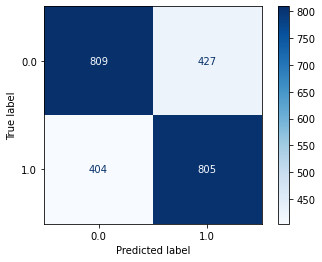

In [152]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn_model,X_test, y_test, cmap=plt.cm.Blues)
pass

## Дерево решений

In [153]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [154]:
depth_array = np.arange(1, 50)
tree_model = tree.DecisionTreeClassifier()
grid = GridSearchCV(tree_model, param_grid = {'max_depth': depth_array}, cv = 5)
grid.fit(X_train, y_train)
min_err_cv = 1 - grid.best_score_
argmin_err_cv = grid.best_estimator_.max_depth

In [155]:
tree_model = tree.DecisionTreeClassifier(max_depth=argmin_err_cv)
tree_model.fit(X_train, y_train)

y_train_pred = tree_model.predict(X_train)
y_test_pred = tree_model.predict(X_test)

error_train  = np.mean(y_train  != y_train_pred)
error_test  = np.mean(y_test  != y_test_pred)

print('train = ', error_train, ', test = ', error_test)

train =  0.24877250409165302 , test =  0.27280163599182006


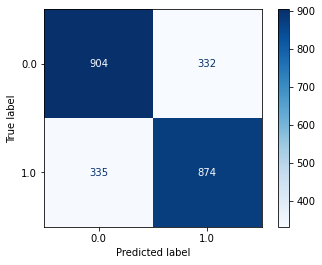

In [156]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(tree_model,X_test, y_test, cmap=plt.cm.Blues)
pass

## Нейронная сеть

In [157]:
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing

In [158]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

In [159]:
for i in range(1, 10):
    mlp_model = MLPClassifier(alpha = 0.005,
                            hidden_layer_sizes = (i, ),
                            max_iter=1200,
                            solver = 'lbfgs', 
                            activation = 'logistic',
                            random_state = 42)
    mlp_model.fit(X_train, y_train)
    print(i, mlp_model.score(X_train, y_train), mlp_model.score(X_test, y_test))

1 0.7096290234588107 0.7124744376278118
2 0.7220403709765412 0.7116564417177914
3 0.747545008183306 0.7059304703476482
4 0.7277686852154938 0.698159509202454
5 0.75177304964539 0.6822085889570552
6 0.759683578832515 0.694478527607362
7 0.7594108019639935 0.7014314928425358
8 0.7677304964539007 0.6932515337423313
9 0.773595199127114 0.6719836400817996


In [160]:
for i in range(1, 10):
    mlp_model = MLPClassifier(alpha = 0.005,
                            hidden_layer_sizes = (i, i),
                            max_iter=1200,
                            solver = 'lbfgs', 
                            activation = 'logistic',
                            random_state = 42)
    mlp_model.fit(X_train, y_train)
    print(i, mlp_model.score(X_train, y_train), mlp_model.score(X_test, y_test))

1 0.7208128750681942 0.7104294478527607
2 0.7281778505182761 0.692842535787321
3 0.7682760501909438 0.7128834355828221
4 0.7454991816693944 0.6977505112474438
5 0.762138570649209 0.678118609406953
6 0.766366612111293 0.6846625766871166
7 0.7764593562465902 0.6850715746421268
8 0.7879159847244953 0.6703476482617587
9 0.7939170758319695 0.6666666666666666


### Гипер-параметры

In [161]:
from sklearn.metrics import accuracy_score

In [162]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (3, 3), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=1500, random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

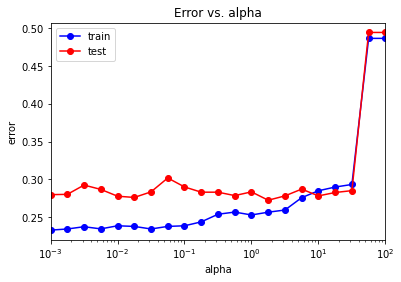

In [163]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

In [164]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.2328150572831424 0.2723926380368098


In [165]:
alpha_opt = alpha_arr[test_err == min_test_err]
alpha_opt = alpha_opt[0]
print(alpha_opt)

1.7782794100389228


### Подставляем

In [166]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (3, 3),
                          solver = 'lbfgs', activation = 'logistic', max_iter=1200, random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.25654664484451717
0.2723926380368098


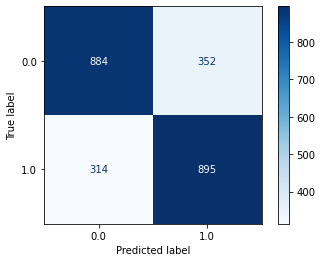

In [167]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mlp_model,X_test, y_test, cmap=plt.cm.Blues)
pass